In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


df = pd.read_csv("FranciscoSalary.csv")
df.head() # Getting the first 5 resulst

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.



,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,Not Provided,567595.43,567595.43,2011
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,Not Provided,538909.28,538909.28,2011
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,Not Provided,335279.91,335279.91,2011
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,Not Provided,332343.61,332343.61,2011
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,Not Provided,326373.19,326373.19,2011


In [201]:
df.info() # Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
EmployeeName        312882 non-null object
JobTitle            312882 non-null object
BasePay             312882 non-null object
OvertimePay         312882 non-null object
OtherPay            312882 non-null object
Benefits            312882 non-null object
TotalPay            312882 non-null float64
TotalPayBenefits    312882 non-null float64
Year                312882 non-null int64
dtypes: float64(2), int64(1), object(6)
memory usage: 21.5+ MB


In [202]:
series_list = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']
for series in series_list:
    df[series] = pd.to_numeric(df[series], errors='coerce') # Turning Objects types to float64 types for analyzing.

In [203]:
df.info() # Checking the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312882 entries, 0 to 312881
Data columns (total 9 columns):
EmployeeName        312882 non-null object
JobTitle            312882 non-null object
BasePay             312276 non-null float64
OvertimePay         312881 non-null float64
OtherPay            312881 non-null float64
Benefits            276722 non-null float64
TotalPay            312882 non-null float64
TotalPayBenefits    312882 non-null float64
Year                312882 non-null int64
dtypes: float64(6), int64(1), object(2)
memory usage: 21.5+ MB


In [204]:
df.describe() # Overall statistics of the database

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,312276.000000,312881.000000,312881.000000,276722.000000,312882.000000,312882.000000,312882.000000
mean,69808.257496,5668.929393,3460.694974,25016.917292,78802.645788,100928.339777,2014.625303
std,45376.929428,12745.655309,7387.263120,15089.077103,53230.758542,66485.186495,2.290899
min,-474.400000,-292.800000,-7058.590000,-13939.420000,-618.130000,-3628.780000,2011.000000
25%,35722.365000,0.000000,0.000000,12729.762500,38803.000000,48955.072500,2013.000000
50%,67710.450000,0.000000,728.000000,28327.330000,74908.790000,100011.290000,2015.000000
75%,99312.302500,5223.120000,3958.680000,35268.162500,111386.897500,142376.300000,2017.000000
max,592394.340000,309481.030000,400184.250000,125891.730000,592394.340000,712802.360000,2018.000000


In [205]:
df['JobTitle'].value_counts().head(10) # Top 10 Jobs Majority wise

Transit Operator                17995
Special Nurse                   10857
Registered Nurse                 9249
Firefighter                      5891
Custodian                        5759
Police Officer 3                 5432
Public Service Trainee           4928
Public Svc Aide-Public Works     4811
Recreation Leader                4784
Police Officer                   4254
Name: JobTitle, dtype: int64

In [206]:
df["Benefits"] # Values of Benefits column

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
312877    0.0
312878    0.0
312879    0.0
312880    0.0
312881    0.0
Name: Benefits, Length: 312882, dtype: float64

In [207]:
df.isnull().sum().sum() # Total number of NaN values in the database


36768

In [208]:
df["Benefits"].isnull().sum() # Number of NaN values in Benefits column


36160

In [209]:
df["BasePay"].isnull().sum() # Number of NaN values in BasePay column

606

In [210]:
df = df[df['Benefits'].notnull()] # Non-NaN values of Benefits column
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36160,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36162,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012


In [211]:
df["Benefits"].isnull().sum() #Confirmation


0

In [212]:
df.tail() # last 5 entries

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
312877,Daniel W Plautz,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312878,David J Thompson,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312879,Keiko Weng Yee Lau,Public Service Trainee,0.0,0.0,0.0,0.0,0.0,0.0,2018
312880,David Wong,Deputy Sheriff,0.0,0.0,0.0,0.0,0.0,0.0,2018
312881,Debora E Howard,Recreation Leader,0.0,0.0,0.0,0.0,0.0,0.0,2018


In [213]:
df = df[df.TotalPay != 0] # Erasing TotalPay rows with the value 0

In [214]:
df = df[df.BasePay !=0] # Same for all these columns

In [215]:
df = df[df.OvertimePay !=0]

In [216]:
df = df[df.OtherPay !=0]

In [217]:
df = df[df.TotalPayBenefits !=0]


In [218]:
df = df[df.Benefits !=0]

In [219]:
df.isin([0]).any().any() # Checking if there is any rows with the value 0 in them

False

In [220]:
df.tail() 

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
311852,Kimberly M Cates,Special Nurse,379.15,607.37,37.92,184.73,1024.44,1209.17,2018
311918,Angelina Jimenez,Special Nurse,19.20,819.22,122.27,170.07,960.69,1130.76,2018
312023,Gemma D Mirkinson,Special Nurse,632.70,71.18,126.54,152.10,830.42,982.52,2018
312031,Gary S Weiner,Junior Clerk,769.91,70.27,127.64,4.39,967.82,972.21,2018
312102,Patrick E Shea,Junior Clerk,487.99,357.23,6.83,8.52,852.05,860.57,2018


In [221]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36161,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36163,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012
36168,David Franklin,Asst Chf of Dept (Fire Dept),204032.52,85503.16,26193.09,58486.10,315728.77,374214.87,2012
36169,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012


In [222]:
 0 in df.values #confirmation

False

In [223]:
df.duplicated(subset=['EmployeeName']) # Seeing if the EmployeeName column has repeated values

36159     False
36161     False
36163     False
36168     False
36169     False
          ...  
311852     True
311918     True
312023     True
312031     True
312102    False
Length: 120675, dtype: bool

In [224]:
df[df['Benefits']<0] # Benefits column with the negative values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
237356,Janusz J Cadelina,Special Nurse,134251.19,18571.06,19984.03,-6003.82,172806.28,166802.46,2017
240387,Esteban M Rodriguez,Special Nurse,141769.26,5590.21,2369.94,-2440.86,149729.41,147288.55,2017
243567,Rahel G Manna,Special Nurse,141861.50,2610.60,28.91,-12112.65,144501.01,132388.36,2017
244806,Kimberly S Morgan,Special Nurse,129989.51,7173.64,3921.68,-13939.42,141084.83,127145.41,2017


In [225]:
df[df['OvertimePay']<0] # OvertimePay column with the negative values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
90714,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.00,28864.64,76573.02,105437.66,2013
189090,Christine Martin,Clinical Nurse Specialist,196388.71,-0.01,250.00,49279.20,196638.70,245917.90,2016
264075,Xiao Ping Zhang,Porter,21792.19,-292.80,94.68,215.96,21594.07,21810.03,2017


In [226]:
df[df['OtherPay']<0] # OtherPay column with the negative values

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
93200,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.60,26889.04,68968.80,95857.84,2013
96168,John G Alexander,Gardener,59733.32,46.76,-46.76,25863.91,59733.32,85597.23,2013
255728,Myraflor F Salcedo,Patient Care Assistant,50342.10,13811.52,-49.36,24539.81,64104.26,88644.07,2017


In [227]:
df[((df['Benefits'] < 0) | (df['OvertimePay'] < 0) | (df['OtherPay'] < 0))] #Selecting the 3 columns that have negative values in them

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
90714,Claudia M Sanchez,Senior Eligibility Worker,75033.03,-0.01,1540.00,28864.64,76573.02,105437.66,2013
93200,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.60,26889.04,68968.80,95857.84,2013
96168,John G Alexander,Gardener,59733.32,46.76,-46.76,25863.91,59733.32,85597.23,2013
189090,Christine Martin,Clinical Nurse Specialist,196388.71,-0.01,250.00,49279.20,196638.70,245917.90,2016
237356,Janusz J Cadelina,Special Nurse,134251.19,18571.06,19984.03,-6003.82,172806.28,166802.46,2017
240387,Esteban M Rodriguez,Special Nurse,141769.26,5590.21,2369.94,-2440.86,149729.41,147288.55,2017
243567,Rahel G Manna,Special Nurse,141861.50,2610.60,28.91,-12112.65,144501.01,132388.36,2017
244806,Kimberly S Morgan,Special Nurse,129989.51,7173.64,3921.68,-13939.42,141084.83,127145.41,2017
255728,Myraflor F Salcedo,Patient Care Assistant,50342.10,13811.52,-49.36,24539.81,64104.26,88644.07,2017
264075,Xiao Ping Zhang,Porter,21792.19,-292.80,94.68,215.96,21594.07,21810.03,2017


In [228]:
df2 = df[~((df['Benefits'] < 0) | (df['OvertimePay'] < 0) | (df['OtherPay'] < 0))].copy() #Made a new database called df2 with no negatie values in it

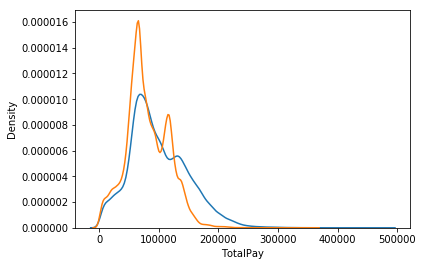

In [229]:
sns.kdeplot(df2['TotalPay'])
sns.kdeplot(df['BasePay']) # Seeing the difference between BasePay and TotalPay

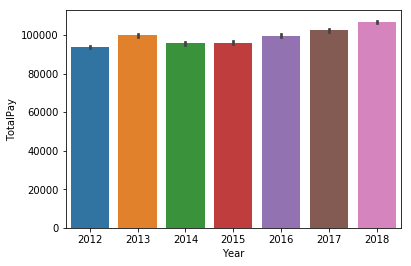

In [230]:
sns.barplot(data=df2, x='Year', y='TotalPay') # TotalPay by the Years 

In [231]:
df2.sort_values('BasePay',ascending=False).head(10) # Most paying 10 jobs

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
229013,Andrew J Sisneros,Transit Operator,358471.39,1620.94,819.02,105695.90,360911.35,466607.25,2017
110532,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
270598,Amy P Hart,Asst Med Examiner,308829.04,4271.29,26971.20,80291.59,340071.53,420363.12,2018
270590,Ellen G Moffatt,Asst Med Examiner,305992.90,3134.23,54885.00,78444.41,364012.13,442456.54,2018
229021,Amy P Hart,Asst Med Examiner,299998.01,5664.09,26022.45,76590.68,331684.55,408275.23,2017
229024,Ellen G Moffatt,Asst Med Examiner,295485.50,3272.04,32077.50,73414.45,330835.04,404249.49,2017
188047,Amy P Hart,Asst Med Examiner,290929.90,9715.46,23414.85,71553.53,324060.21,395613.74,2016
270606,Ai Kyung Chung,Anesthetist,289778.01,3123.73,16069.56,77876.53,308971.30,386847.83,2018
229034,Ai Kyung Chung,Anesthetist,281338.05,4722.11,18978.24,74321.74,305038.40,379360.14,2017
148651,Ellen G Moffatt,Asst Med Examiner,279311.10,3829.36,114433.58,72446.93,397574.04,470020.97,2015


In [232]:
df.sort_values('BasePay',ascending=False).head(20) # Most paying 20 jobs

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
229013,Andrew J Sisneros,Transit Operator,358471.39,1620.94,819.02,105695.90,360911.35,466607.25,2017
110532,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
270598,Amy P Hart,Asst Med Examiner,308829.04,4271.29,26971.20,80291.59,340071.53,420363.12,2018
270590,Ellen G Moffatt,Asst Med Examiner,305992.90,3134.23,54885.00,78444.41,364012.13,442456.54,2018
229021,Amy P Hart,Asst Med Examiner,299998.01,5664.09,26022.45,76590.68,331684.55,408275.23,2017
229024,Ellen G Moffatt,Asst Med Examiner,295485.50,3272.04,32077.50,73414.45,330835.04,404249.49,2017
188047,Amy P Hart,Asst Med Examiner,290929.90,9715.46,23414.85,71553.53,324060.21,395613.74,2016
270606,Ai Kyung Chung,Anesthetist,289778.01,3123.73,16069.56,77876.53,308971.30,386847.83,2018
229034,Ai Kyung Chung,Anesthetist,281338.05,4722.11,18978.24,74321.74,305038.40,379360.14,2017
148651,Ellen G Moffatt,Asst Med Examiner,279311.10,3829.36,114433.58,72446.93,397574.04,470020.97,2015


In [233]:
a = df2[df2['JobTitle']=='Asst Med Examiner'][['BasePay','Year']] # making (a) the BasePay by Year of the Asst Med Examiner job


In [234]:
a.sort_values("BasePay",ascending=False) # Sorting BasePay of Asst Med Examiners DESC

,BasePay,Year
110532,318835.49,2014
270598,308829.04,2018
270590,305992.90,2018
229021,299998.01,2017
229024,295485.50,2017
188047,290929.90,2016
148651,279311.10,2015
148652,279311.03,2015
188068,277069.23,2016
72928,272855.51,2013


In [235]:
df2.reset_index(drop=True,inplace=True) # Since we have removed NaN and 0 values indexes got entlanged here we reset the index

In [236]:
df2 # checking the indexes

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
1,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012
2,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012
3,David Franklin,Asst Chf of Dept (Fire Dept),204032.52,85503.16,26193.09,58486.10,315728.77,374214.87,2012
4,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2012
...,...,...,...,...,...,...,...,...,...
120660,Kimberly M Cates,Special Nurse,379.15,607.37,37.92,184.73,1024.44,1209.17,2018
120661,Angelina Jimenez,Special Nurse,19.20,819.22,122.27,170.07,960.69,1130.76,2018
120662,Gemma D Mirkinson,Special Nurse,632.70,71.18,126.54,152.10,830.42,982.52,2018
120663,Gary S Weiner,Junior Clerk,769.91,70.27,127.64,4.39,967.82,972.21,2018


In [237]:
year_dict = {2012: "2", 2013: "3", 2014: "4", 2015: "5", 2016: "6", 2017: "7", 2018: "8"} # Making a dict for years 


In [238]:
df2.replace({"Year": year_dict},inplace=True) # Applying the dict to the database

In [239]:
df2

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2
1,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2
2,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2
3,David Franklin,Asst Chf of Dept (Fire Dept),204032.52,85503.16,26193.09,58486.10,315728.77,374214.87,2
4,Brendan Ward,"Battlion Chief, Fire Suppressi",174822.47,118215.58,28845.78,49648.09,321883.83,371531.92,2
...,...,...,...,...,...,...,...,...,...
120660,Kimberly M Cates,Special Nurse,379.15,607.37,37.92,184.73,1024.44,1209.17,8
120661,Angelina Jimenez,Special Nurse,19.20,819.22,122.27,170.07,960.69,1130.76,8
120662,Gemma D Mirkinson,Special Nurse,632.70,71.18,126.54,152.10,830.42,982.52,8
120663,Gary S Weiner,Junior Clerk,769.91,70.27,127.64,4.39,967.82,972.21,8


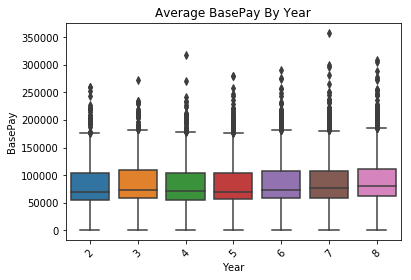

In [240]:
sns.boxplot(data=df3, x='Year', y='BasePay')
plt.xlabel('Year')
plt.ylabel('BasePay')
plt.title('Average BasePay By Year')
plt.xticks(rotation='45')
plt.show()  # Boxplot of the Average BasePay By Year

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



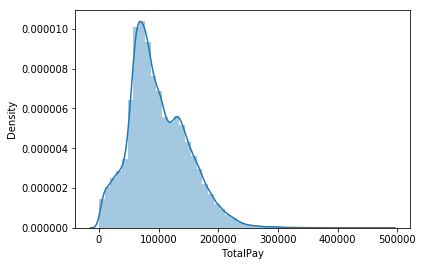

In [241]:
sns.distplot(df2['TotalPay']) # Distplot of the TotalPay

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



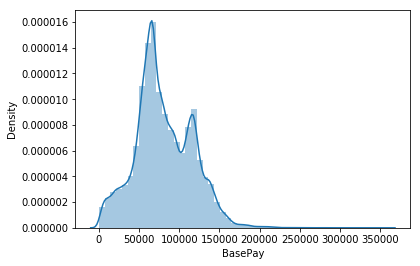

In [242]:
sns.distplot(df2['BasePay']) # Distplot of the BasePay

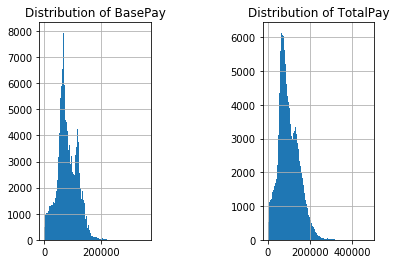

In [243]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax = df2.BasePay.hist(bins=100, ax=ax1)
ax.set_title("Distribution of BasePay")


ax2 = fig.add_subplot(1,2,2)
ax = df2.TotalPay.hist(bins=100, ax=ax2)
ax.set_title("Distribution of TotalPay") # Distribution plots of the BasePay and TotalPay

plt.subplots_adjust(wspace=1) 

In [244]:
df2['JobTitle'] = df2['JobTitle'].str.lower()
value_counts = df2['JobTitle'].value_counts().head(10)
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Job Title', 'Number of people in that job']
df_value_counts['Job Title'] = df_value_counts['Job Title'].str.capitalize() #Checking for the top 10 populous jobs again 
df_value_counts 

,Job Title,Number of people in that job
0,Transit operator,16639
1,Registered nurse,7405
2,Firefighter,5238
3,Police officer 3,4818
4,Custodian,3957
5,Deputy sheriff,3822
6,Patient care assistant,3407
7,Special nurse,3321
8,Police officer,3185
9,Police officer 2,2702


[16639  7405  5238  4818  3957  3822  3407  3321  3185  2702]


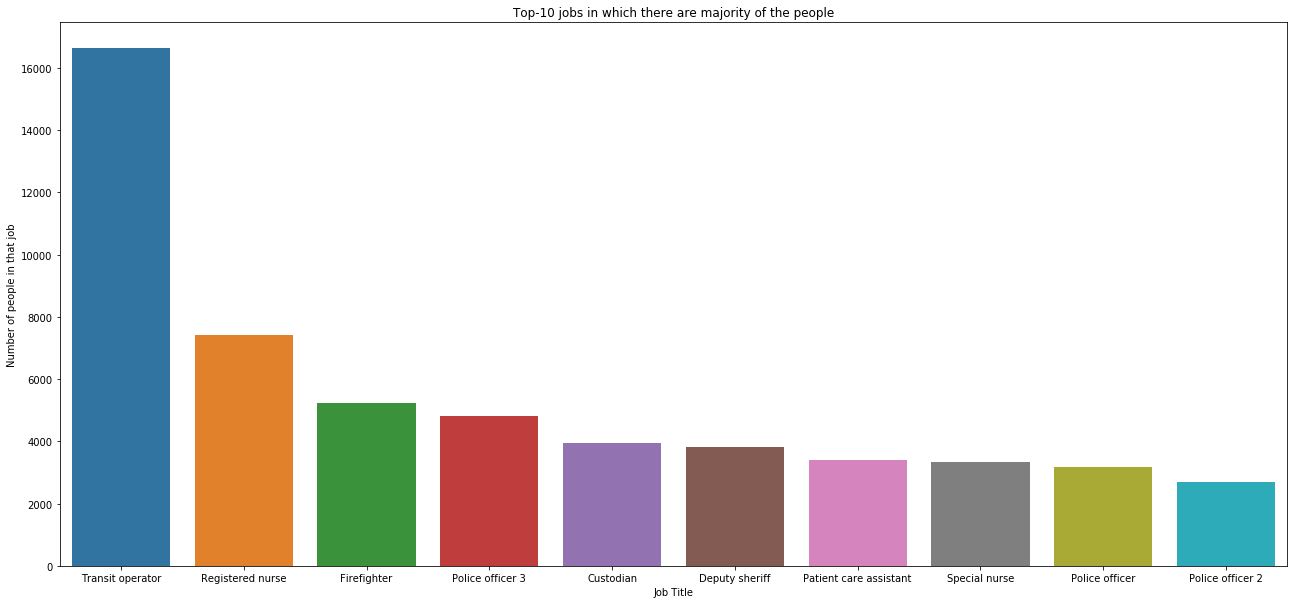

In [245]:
plt.figure(figsize=(22,10))
values_column = df_value_counts.loc[:,'Number of people in that job']
values = values_column.values
print(values)
sns.barplot(x=df_value_counts['Job Title'], y=df_value_counts['Number of people in that job'])
plt.title('Top-10 jobs in which there are majority of the people') # Barplot of the top 10 populous jobs
plt.show()

In [246]:
fig = px.pie(df_value_counts, values=values, names='Job Title') # Pie chart of the Job Titles
fig.show()

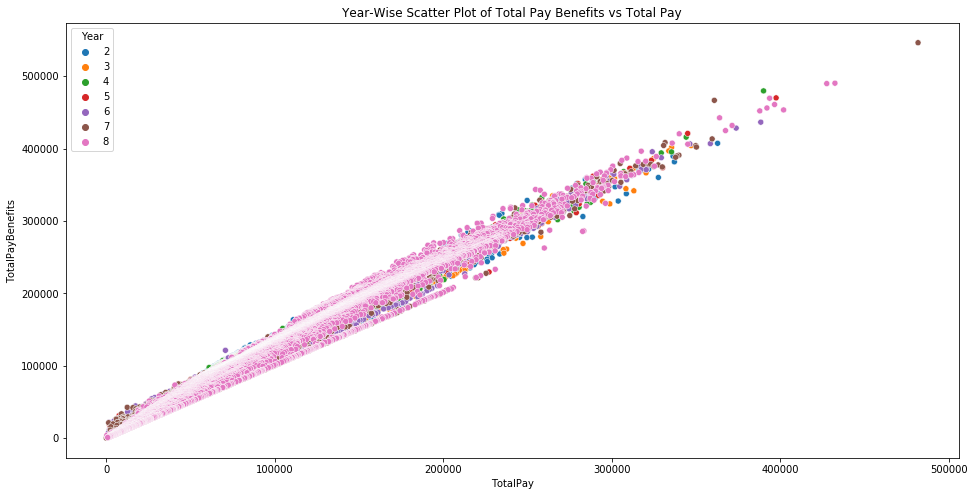

In [247]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=df2['TotalPay'], y=df2['TotalPayBenefits'], hue=df2['Year'])
plt.title('Year-Wise Scatter Plot of Total Pay Benefits vs Total Pay') # Scatter plot of the TotalPayBenefits vs TotalPay
plt.show()

In [250]:
value_counts = df2['Year'].value_counts()
df_value_counts = pd.DataFrame(value_counts)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Year', 'Number of people doing job'] # Counts working people per Year
df_value_counts

,Year,Number of people doing job
0,8,18728
1,7,18335
2,6,18011
3,5,17189
4,4,16506
5,2,15983
6,3,15913


[18728 18335 18011 17189 16506 15983 15913]


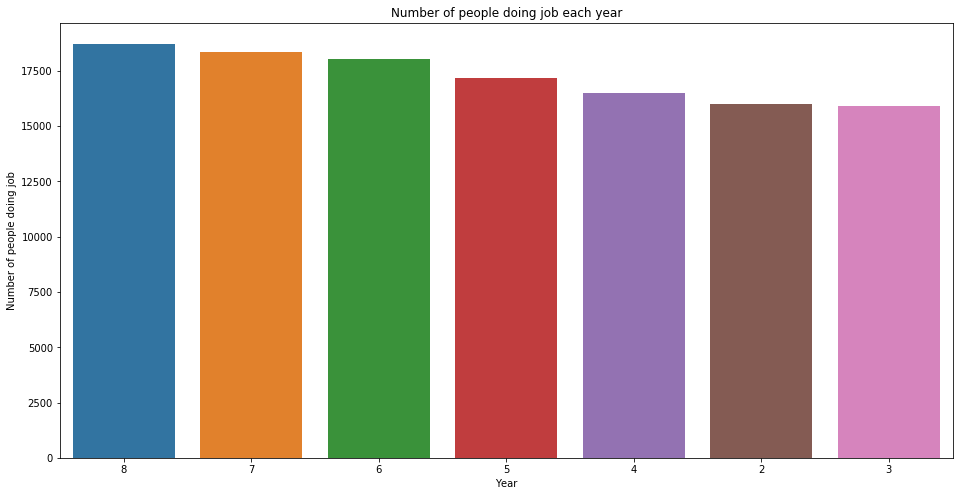

In [251]:
plt.figure(figsize=(16,8))
values_column = df_value_counts.loc[:,'Number of people doing job']
values = values_column.values
print(values)
sns.barplot(x=df_value_counts['Year'], y=df_value_counts['Number of people doing job'])
plt.title('Number of people doing job each year') # Barplot of the counts of working people per year
plt.show()

In [252]:
fig = px.pie(df_value_counts, values=values, names='Year') # Same but as Pie Chart
fig.show()